In [1]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1088131773.CSV',
  'input/dry/530759577.CSV',
  'input/dry/78520028.CSV',
  'input/dry/1780329192.CSV',
  'input/dry/1610930929.CSV',
  'input/dry/1361302372.CSV',
  'input/dry/1875995420.CSV',
  'input/dry/23004232.CSV',
  'input/dry/871217096.CSV',
  'input/dry/1598104040.CSV',
  'input/dry/916165555.CSV',
  'input/dry/973161134.CSV',
  'input/dry/1894775098.CSV',
  'input/dry/1425341542.CSV',
  'input/dry/853638664.CSV',
  'input/dry/187848587.CSV',
  'input/dry/1718437362.CSV',
  'input/dry/1530466877.CSV',
  'input/dry/1008725065.CSV',
  'input/dry/1498192866.CSV',
  'input/dry/1408919771.CSV',
  'input/dry/452734242.CSV',
  'input/dry/945578527.CSV',
  'input/dry/609782929.CSV',
  'input/dry/1605306145.CSV',
  'input/dry/837508863.CSV',
  'input/dry/1056519811.CSV',
  'input/dry/403715699.CSV',
  'input/dry/2133598297.CSV'],
 'pee': ['input/pee/1550823235.CSV',
  'input/pee/701548843.CSV',
  'input/pee/1495269511.CSV',
  'input/pee/1871661031.CSV',
  'input/pe

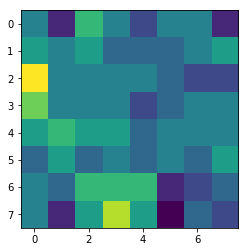

In [2]:
#Read in CSV files
import pandas as pd

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #add label
        labels.append(index)
    #add label name    
    label_names.append(key)
    index += 1

#Print test images
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0].reshape((8,8)))

In [3]:
label_names

['dry', 'pee']

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.05, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



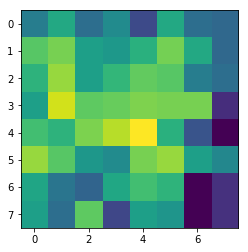

In [6]:
plt.imshow(X_train[0].reshape((8,8)))

In [7]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = './dogs/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(Dropout(0.05));
# my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
#my_new_model.add(Dense(64, activation='relu'))
my_new_model.add(Dense(48, activation='relu'))
my_new_model.add(Dropout(0.05));
my_new_model.add(Dense(32, activation='relu'))
my_new_model.add(Dropout(0.05));
# my_new_model.add(Dense(16, activation='relu'))
# my_new_model.add(Dropout(0.2));
# my_new_model.add(Dense(8, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# my_new_model.layers[0].trainable = False

In [8]:
from tensorflow.python.keras import optimizers

# sgd = optimizers.SGD(lr=0.0004, clipnorm=1.)
my_new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:

#data
my_new_model.fit(
        X_train, y_train,
#         validation_split=0.1,
        validation_data=(X_test, y_test),
        validation_steps=10,
        steps_per_epoch=2000,
        epochs=5)

Epoch 1/5
2000/2000 [==============================] - 2s 969us/step - loss: 0.1551 - acc: 0.9388 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 2/5
2000/2000 [==============================] - 2s 863us/step - loss: 0.0557 - acc: 0.9809 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 3/5
2000/2000 [==============================] - 2s 985us/step - loss: 0.0422 - acc: 0.9852 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 4/5
2000/2000 [==============================] - 2s 977us/step - loss: 0.0304 - acc: 0.9898 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 5/5
2000/2000 [==============================] - 2s 956us/step - loss: 0.0249 - acc: 0.9917 - val_loss: 0.0294 - val_acc: 1.0000


In [10]:
print(my_new_model.metrics_names)
print(my_new_model.evaluate(X_test, y_test))


['loss', 'acc']
3/3 [==============================] - 0s 273us/step
[0.029419822618365288, 1.0]


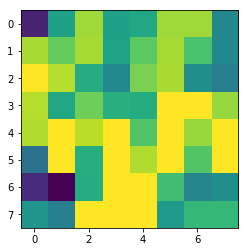

Should be: dry
['dry', 'pee']
[[9.9976724e-01 2.3274518e-04]]
Prediction: dry


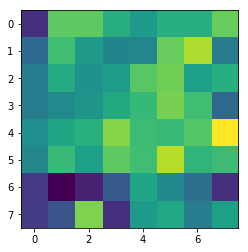

Should be: dry
['dry', 'pee']
[[9.9989927e-01 1.0072322e-04]]
Prediction: dry


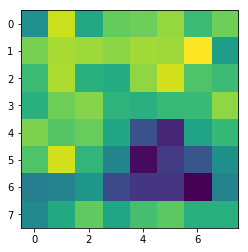

Should be: pee
['dry', 'pee']
[[0.08417127 0.9158287 ]]
Prediction: pee


IndexError: index 3 is out of bounds for axis 0 with size 3

In [11]:
import matplotlib.pyplot as plt


for i in range (0,5):
    image = X_test[i]
    pred = my_new_model.predict(X_test[i:i+1])
    plt.imshow(image.reshape((8,8)))
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 
